In [ ]:
import os

In [ ]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense, AveragePooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/OCR/train.csv')
train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = np.array(train_data)
random.shuffle(train_data)
train_data = pd.DataFrame(train_data)

In [ ]:
X_train = train_data.drop(0, axis=1)
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train_data[0]
len(y_train.unique())

26

In [ ]:
modified_data = []
for image_array in X_train.iloc:
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)

modified_array = np.array(modified_data)

In [ ]:
np.save('modified_train', modified_array)

In [ ]:
X_train: np.ndarray = np.load('./modified_train.npy')
X_train.shape

(88799, 28, 28)

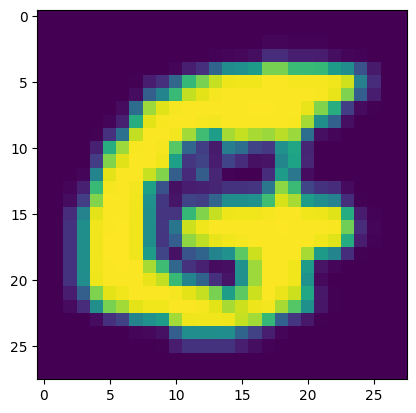

In [ ]:
plt.imshow(X_train[0])

In [ ]:
array = np.array([X_train[0]])
print(array)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     4   4   2   2   2   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   4   5   9
    32  32  21  21  20   9   4   2   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   3  21  34  82 125 129 140
   203 203 174 172 170 140 125  63  18   0   0]
  [  0   0   0   0   0   0   0   1  20  34  84 170 204 233 249 250 250
   254 254 252 252 252 250 237 111  32   0   0]
  [  0   0   0   0   0   0   0   8  77 115 172 232 245 252 254 254 254
   254 254 254 254 253 247 206  76  20   0   0]
  [  0   0   0   0   0   0   7  90 218 243 252 254 254 254 254 254 255
   255 254 254 247 207 159  47   7   1   0   0]
  [  0   0   0   0   0   3  22 159 245 253 254 2

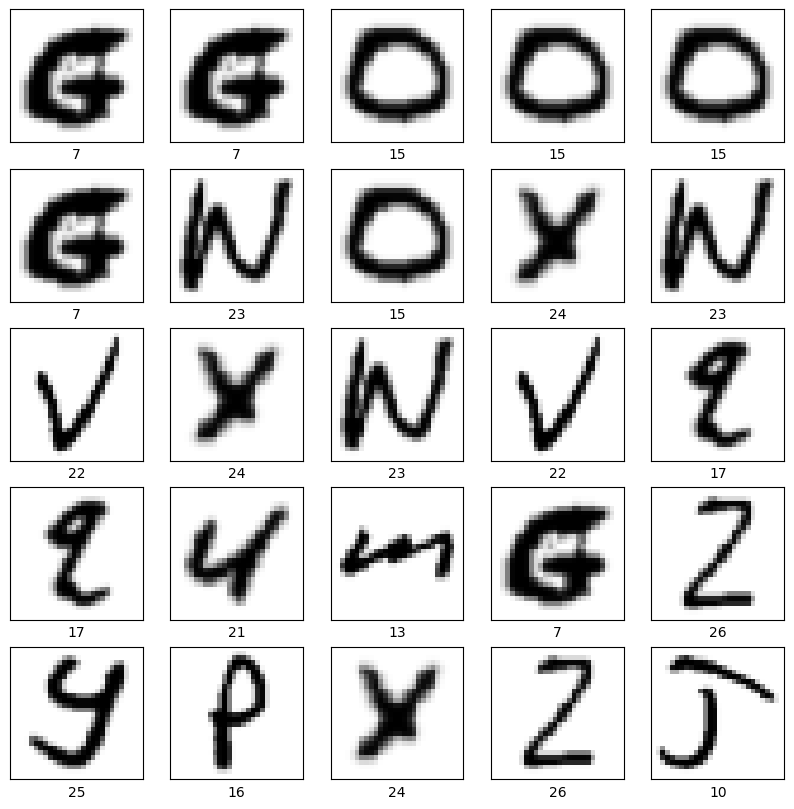

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
from tensorflow.keras import layers  
from tensorflow.keras import models

In [ ]:
modelv1 = models.Sequential() 
modelv1.add(layers.Conv2D(6, (5,5), strides=1, activation='tanh', padding='same', input_shape=(28,28,1)))
modelv1.add(layers.AveragePooling2D((2,2), strides=2, padding='valid'))
modelv1.add(layers.Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid'))
modelv1.add(layers.AveragePooling2D((2,2), strides=2, padding='valid'))
modelv1.add(layers.Conv2D(120, (5,5), strides=1, activation='tanh',padding='valid'))

modelv1.add(layers.Flatten())
modelv1.add(layers.Dense(84, activation='tanh'))
modelv1.add(layers.Dense(28, activation='softmax'))

In [ ]:
modelv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
modelv1.compile(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),                                                                                                                                                                                 
        metrics=['accuracy']                                                                                                                  
)

In [ ]:
history = modelv1.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
2220/2220 [==============================] - 20s 4ms/step - loss: 0.5337 - accuracy: 0.8409 - val_loss: 0.3328 - val_accuracy: 0.8907
Epoch 2/10
2220/2220 [==============================] - 10s 4ms/step - loss: 0.2410 - accuracy: 0.9191 - val_loss: 0.2736 - val_accuracy: 0.9075
Epoch 3/10
2220/2220 [==============================] - 10s 5ms/step - loss: 0.1823 - accuracy: 0.9367 - val_loss: 0.2462 - val_accuracy: 0.9206
Epoch 4/10
2220/2220 [==============================] - 9s 4ms/step - loss: 0.1494 - accuracy: 0.9468 - val_loss: 0.2439 - val_accuracy: 0.9208
Epoch 5/10
2220/2220 [==============================] - 10s 5ms/step - loss: 0.1260 - accuracy: 0.9540 - val_loss: 0.2268 - val_accuracy: 0.9298
Epoch 6/10
2220/2220 [==============================] - 10s 5ms/step - loss: 0.1079 - accuracy: 0.9609 - val_loss: 0.2147 - val_accuracy: 0.9335
Epoch 7/10
2220/2220 [==============================] - 10s 5ms/step - loss: 0.0967 - accuracy: 0.9641 - val_loss: 0.2199 - val_acc

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.533698,0.840862,0.332822,0.890653,0
1,0.241025,0.919101,0.273550,0.907489,1
2,0.182283,0.936739,0.246156,0.920552,2
3,0.149388,0.946846,0.243906,0.920833,3
4,0.126001,0.954025,0.226810,0.929786,4
5,0.107854,0.960909,0.214715,0.933502,5
6,0.096733,0.964104,0.219862,0.933108,6
7,0.086912,0.966708,0.215742,0.936993,7
8,0.078494,0.970397,0.215596,0.937444,8
9,0.073078,0.971635,0.225174,0.935923,9


In [ ]:
def plotTraining(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training_acc')
    plt.plot(epochs, val_acc, 'b', label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend() 

    plt.figure() 

    plt.plot(epochs, loss, 'bo', label='Training_loss')
    plt.plot(epochs, val_loss, 'b', label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend() 

    plt.show()

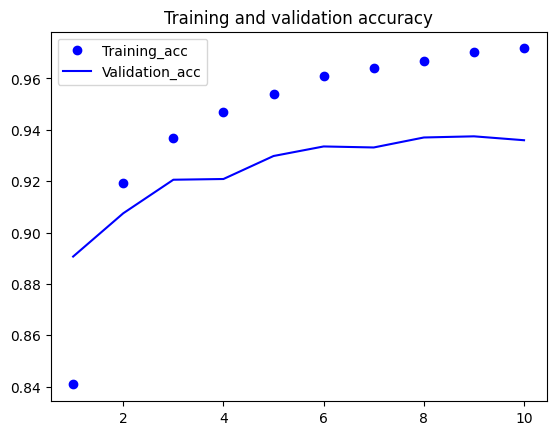

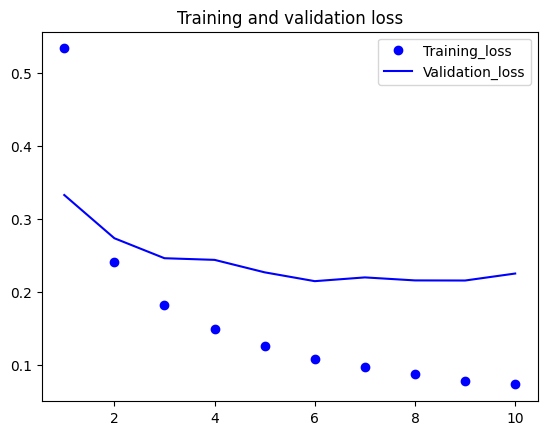

In [ ]:
plotTraining(history)

In [ ]:
modelv2 = models.Sequential() 
modelv2.add(layers.Conv2D(6, (5,5), strides=1, activation='tanh', padding='same', input_shape=(28,28,1)))
modelv2.add(layers.AveragePooling2D((2,2), strides=1, padding='valid'))
modelv2.add(layers.Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid'))
modelv2.add(layers.AveragePooling2D((2,2), strides=1, padding='valid'))
modelv2.add(layers.Conv2D(120, (5,5), strides=1, activation='tanh',padding='valid'))

modelv2.add(layers.Flatten())
modelv2.add(layers.Dense(84, activation='tanh'))
modelv2.add(layers.Dense(28, activation='softmax'))

In [ ]:
modelv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 27, 27, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 22, 22, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 120)       48120     
                                                                 
 flatten_1 (Flatten)         (None, 38880)            

In [ ]:
modelv2.compile(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),                                                                                                                                                                                 
        metrics=['accuracy']                                                                                                                  
)

In [ ]:
historyv2 = modelv2.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
2220/2220 [==============================] - 14s 5ms/step - loss: 1.0532 - accuracy: 0.6930 - val_loss: 0.7537 - val_accuracy: 0.7662
Epoch 2/10
2220/2220 [==============================] - 11s 5ms/step - loss: 0.6865 - accuracy: 0.7885 - val_loss: 0.6522 - val_accuracy: 0.8025
Epoch 3/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.5879 - accuracy: 0.8185 - val_loss: 0.5685 - val_accuracy: 0.8229
Epoch 4/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.5283 - accuracy: 0.8347 - val_loss: 0.5183 - val_accuracy: 0.8356
Epoch 5/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.5101 - accuracy: 0.8405 - val_loss: 0.5441 - val_accuracy: 0.8341
Epoch 6/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.4763 - accuracy: 0.8507 - val_loss: 0.4926 - val_accuracy: 0.8467
Epoch 7/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.4481 - accuracy: 0.8587 - val_loss: 0.4760 - val_ac

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.533698,0.840862,0.332822,0.890653,0
1,0.241025,0.919101,0.273550,0.907489,1
2,0.182283,0.936739,0.246156,0.920552,2
3,0.149388,0.946846,0.243906,0.920833,3
4,0.126001,0.954025,0.226810,0.929786,4
5,0.107854,0.960909,0.214715,0.933502,5
6,0.096733,0.964104,0.219862,0.933108,6
7,0.086912,0.966708,0.215742,0.936993,7
8,0.078494,0.970397,0.215596,0.937444,8
9,0.073078,0.971635,0.225174,0.935923,9


In [ ]:
def plotTraining(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training_acc')
    plt.plot(epochs, val_acc, 'b', label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend() 

    plt.figure() 

    plt.plot(epochs, loss, 'bo', label='Training_loss')
    plt.plot(epochs, val_loss, 'b', label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend() 

    plt.show()

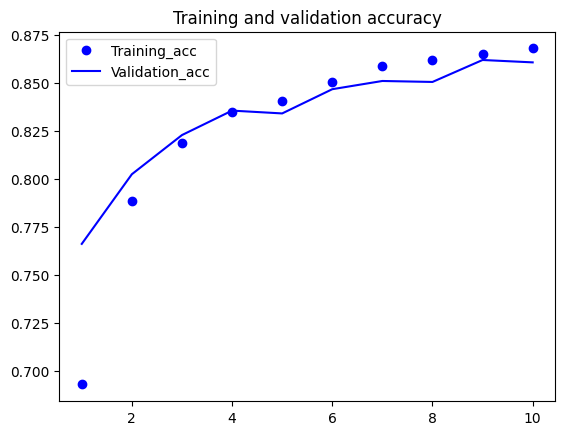

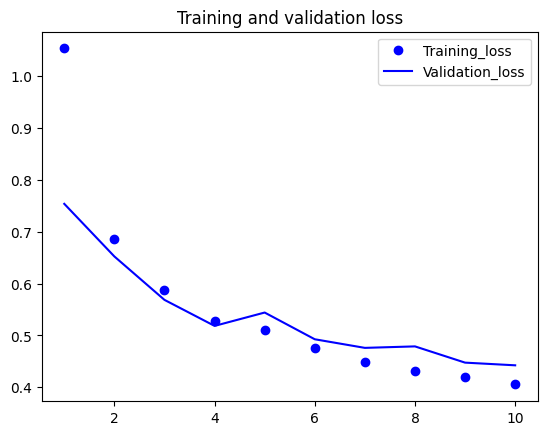

In [ ]:
plotTraining(historyv2)